In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
import pydotplus
from keras.utils.vis_utils import model_to_dot
import numpy as np
import pydot
np.random.seed(7)
mnist = tf.keras.datasets.mnist

In [50]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)             

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 20s 455us/sample - loss: 0.0825 - acc: 0.9746 - val_loss: 0.0478 - val_acc: 0.9848
Epoch 2/25
45000/45000 [==============================] - 21s 457us/sample - loss: 0.0537 - acc: 0.9837 - val_loss: 0.0425 - val_acc: 0.9872
Epoch 3/25
45000/45000 [==============================] - 20s 454us/sample - loss: 0.0390 - acc: 0.9876 - val_loss: 0.0482 - val_acc: 0.9862
Epoch 4/25
45000/45000 [==============================] - 20s 451us/sample - loss: 0.0354 - acc: 0.9886 - val_loss: 0.0392 - val_acc: 0.9891
Epoch 5/25
45000/45000 [==============================] - 21s 457us/sample - loss: 0.0286 - acc: 0.9910 - val_loss: 0.0396 - val_acc: 0.9893
Epoch 6/25
45000/45000 [==============================] - 20s 452us/sample - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0345 - val_acc: 0.9906
Epoch 7/25
45000/45000 [==============================] - 20s 451us/sample - loss: 0.0233 - acc: 0.9925 

In [59]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02906384497564628
Test accuracy: 0.9925


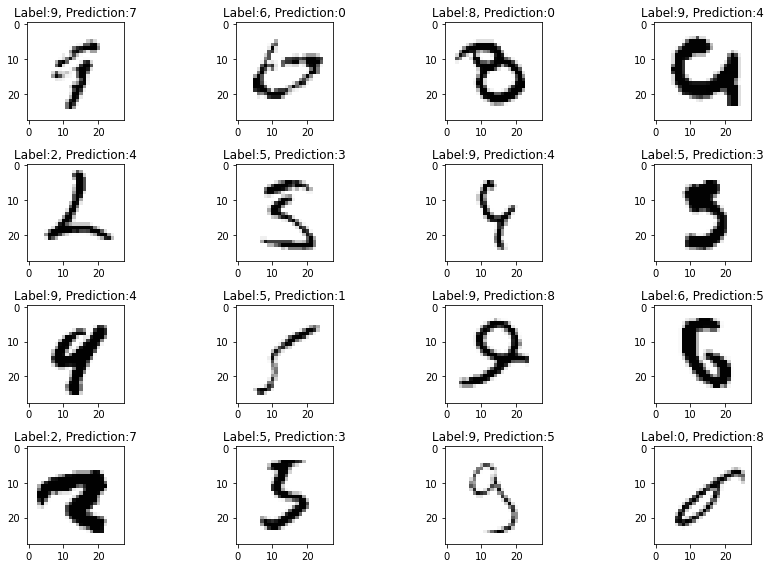

In [61]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()